# High Dynmaic Range (HDR) Imaging

**Satya Mallick, LearnOpenCV.com**

!["HDR Image Example"](high-dynamic-range-hdr.jpg)

# Basic Idea

1. The **dynamic range** of images is limited to 8-bits (0 - 255) per channel
2. Very bright pixels saturate to 255
3. Very dark pixels clip to 0

# Step 1: Capture Multiple Exposures

!["HDR Image Sequence"](hdr-image-sequence.jpg)


In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readImagesAndTimes():
  # List of file names  
  filenames = ["img_0.033.jpg", "img_0.25.jpg", "img_2.5.jpg", "img_15.jpg"]
  
  # List of exposure times  
  times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
  # Read images 
  images = []
  for filename in filenames:
    im = cv2.imread(filename)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    images.append(im)
  
  return images, times


# Step 2: Align Images

![Aligned vs. Unaligned](aligned-unaligned-hdr-comparison.jpg)

In [39]:
# Read images and exposure times
images, times = readImagesAndTimes()

# Align Images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Step 3: Estimate Camera Response Function

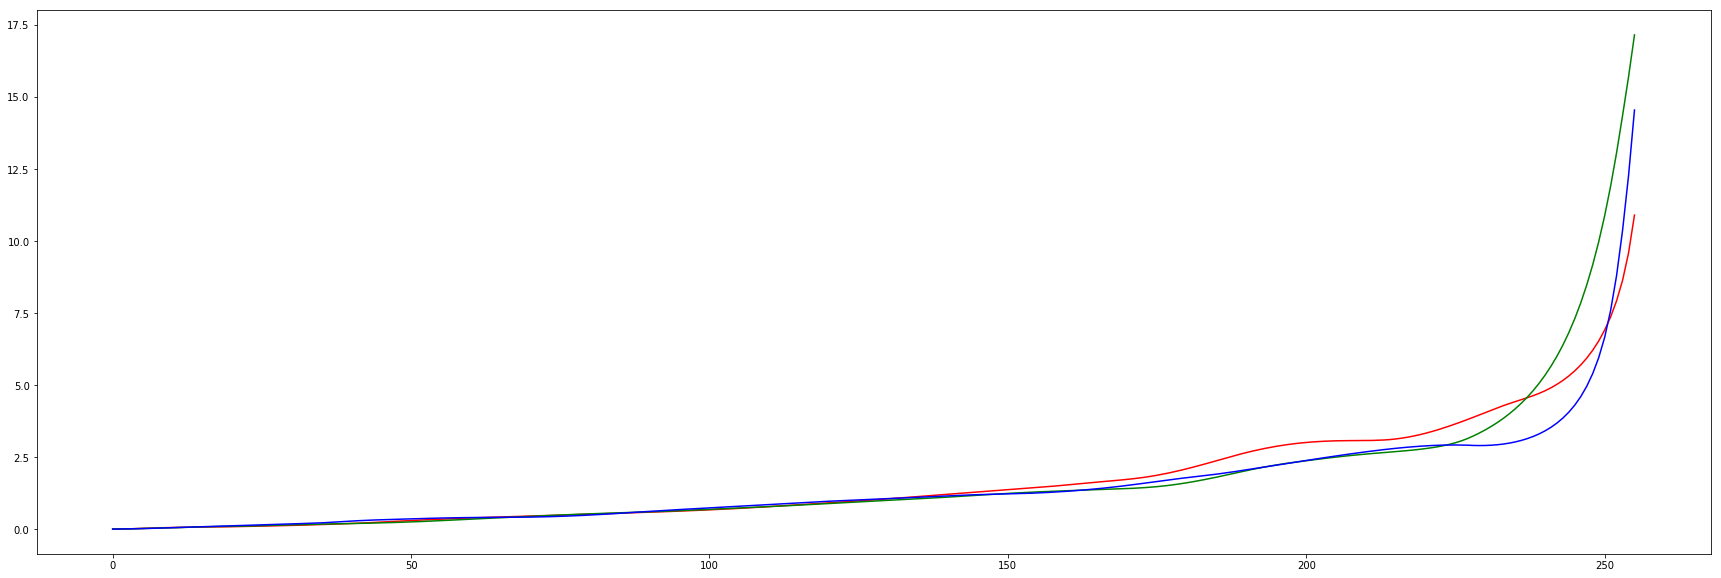

In [40]:
# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Plot CRF
x = np.arange(256, dtype=np.uint8)
y = np.squeeze(responseDebevec)

plt.figure(figsize=(30,10))
plt.plot(x, y[:,0],'r'  , x, y[:,1],'g', x, y[:,2],'b');

# Step 4: Merge Exposure into an HDR Image

In [41]:
# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

# Step 5: Tonemapping 

Many Tonemapping algorithms are available in OpenCV. We chose Durand as it has more controls.

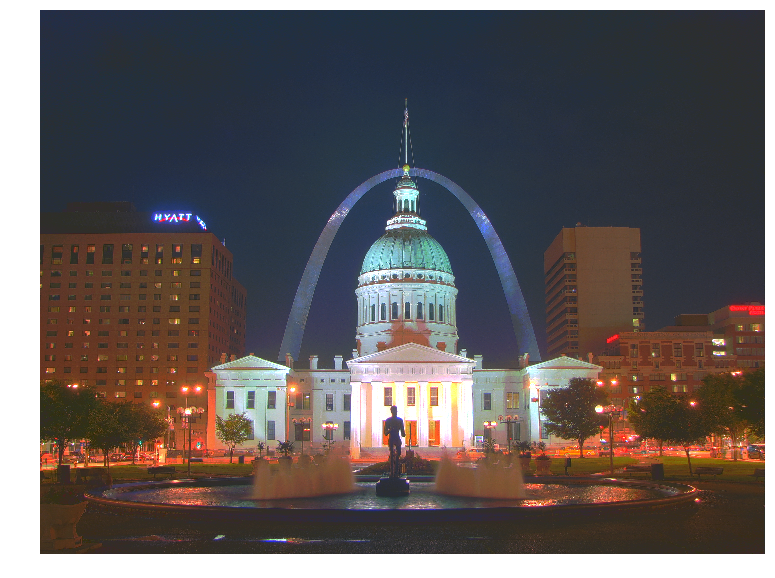

In [121]:
tonemapDurand = cv2.createTonemapDurand(1.2,3,1.0,1.0,1.5)
ldrDurand = tonemapDurand.process(hdrDebevec)
ldrDurand = np.clip(3 * ldrDurand,0,1)
plt.figure(figsize=(20,10)); plt.imshow(ldrDurand); plt.axis('off');
